In [65]:
%matplotlib inline
import os, pickle, re
import collections
from nltk.corpus import stopwords
from nltk.metrics.distance import edit_distance
import matplotlib.pyplot as plt
from nltk.corpus import lin_thesaurus as thes

In [29]:
def load():
    print "Loading Corpus"
    path = os.getcwd()
    f_scraped = os.path.join(path,'scraper_output_1437237126.pickle')
    #f_scraped = os.path.join(path,'scraper_output.pickle')
    f = open(f_scraped,'rb')
    statements = pickle.load(f)
    f.close()
    return statements

In [30]:
def words(text): return re.findall('[a-z]+', text.lower())

In [43]:
def reverse_index(statements):
    d = collections.defaultdict(list)
    sp=set(stopwords.words('english'))
    for i, s in enumerate(statements):
        ws = words(s[2])+words(s[3])
        ws = set(ws)
        for w in ws:
            if w not in sp:
                d[w].append(i)
    return d
    

In [60]:
def score(s,st):
    ws = words(st[2])+words(st[3])
    w = words(s)
    d = []
    for word in w:
        t = min(ws,key = lambda x: edit_distance(x,word))
        d.append(edit_distance(t,word))
    return min(d)

In [32]:
s = load()

Loading Corpus


In [8]:
s[0]

(u'Pants on Fire!',
 u'More fake news passed off as real',
 u'Bloggers',
 u'"Christian Pastor in Vermont Sentenced to One Year in Prison After Refusing to Marry Gay Couple"')

In [44]:
ri = reverse_index(s)

In [45]:
len(ri.keys())

3419

In [20]:
ri.keys()[0]

u'limited'

In [46]:
#find most common words
m = max(ri.keys(), key = lambda x: len(ri[x]))
print m, len(ri[m])

obama 278


In [47]:
len(stopwords.words('english'))

127

4


(array([  16.,    0.,    0.,    0.,    0.,  167.,  653.,    0.,  162.,    2.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

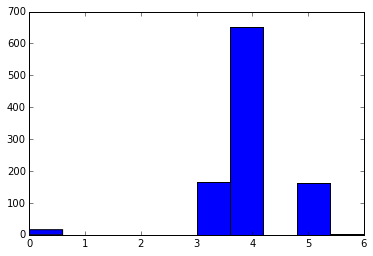

In [64]:
sample = 'Bernie'
ds = []
print score(sample,s[0])
for st in s:
    ds.append(score(sample,st))
plt.hist(ds)

In [53]:
len(ds)

1000

In [54]:
ds[0]

u'christian'

In [66]:
thes.similarity('econ','economy')

KeyboardInterrupt: 